# Part 1: Data Cleaning and Preparation
---
The first thing we did was to clean and prepare the dataset to help us gain meaningful insights from the dataset and help us answer the question we posed.

**Question:** Are we able to predict if a dogbreed is good for novice owners given the various attributes


**Dataset:** [Dog breed (DogTime) dataset](https://www.kaggle.com/datasets/mexwell/dog-breeds-dogtime-dataset)

In [1]:
# Import Basic Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---
### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
data = pd.read_csv('breeds.csv')
data.head()

,breed,url,a_adaptability,a1_adapts_well_to_apartment_living,a2_good_for_novice_owners,a3_sensitivity_level,a4_tolerates_being_alone,a5_tolerates_cold_weather,a6_tolerates_hot_weather,b_all_around_friendliness,...,d6_wanderlust_potential,e_exercise_needs,e1_energy_level,e2_intensity,e3_exercise_needs,e4_potential_for_playfulness,breed_group,height,weight,life_span
0,Afador,https://dogtime.com/dog-breeds/afador,2,1,1,3,3,4,2,3,...,4,4,4,4,4,3,Mixed Breed Dogs,20 to 29 inches,50 to 75 pounds,10 to 12 years
1,Affenhuahua,https://dogtime.com/dog-breeds/affenhuahua,3,4,4,4,1,2,3,3,...,2,3,4,3,3,3,Mixed Breed Dogs,6 to 12 inches,4 to 12 pounds,13 to 18 years
2,Affenpinscher,https://dogtime.com/dog-breeds/affenpinscher,3,5,4,3,1,3,3,3,...,2,4,4,3,3,4,Companion Dogs,9 inches to 11 inches tall at the shoulder,7 to 9 pounds,12 to 14 years
3,Afghan Hound,https://dogtime.com/dog-breeds/afghan-hound,4,5,3,5,2,5,5,4,...,5,4,5,2,4,4,Hound Dogs,"2 feet to 2 feet, 4 inches tall at the shoulder",50 to 60 pounds,10 to 12 years
4,Airedale Terrier,https://dogtime.com/dog-breeds/airedale-terrier,2,1,2,3,2,3,3,4,...,4,5,5,3,5,5,Terrier Dogs,"1 foot, 9 inches to 1 foot, 11 inches tall at ...",40 to 65 pounds,10 to 13 years


Check the vital statistics of the dataset using the `info` and `shape` attributes.

In [3]:
data.shape

(349, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   breed                               349 non-null    object
 1   url                                 349 non-null    object
 2   a_adaptability                      349 non-null    int64 
 3   a1_adapts_well_to_apartment_living  349 non-null    int64 
 4   a2_good_for_novice_owners           349 non-null    int64 
 5   a3_sensitivity_level                349 non-null    int64 
 6   a4_tolerates_being_alone            349 non-null    int64 
 7   a5_tolerates_cold_weather           349 non-null    int64 
 8   a6_tolerates_hot_weather            349 non-null    int64 
 9   b_all_around_friendliness           349 non-null    int64 
 10  b1_affectionate_with_family         349 non-null    int64 
 11  b2_incredibly_kid_friendly_dogs     349 non-null    int64 

## 1. Preliminary Feature Selection

Firstly, our dataset contains alot of viaiables (`37`). Using all these variables will not be feasible because not all the variables will be helpful in the classification.

The choise of the variables has been made carefully. Following is finding the correlation of each variable against "a2_good_for_novice_owners", such that the variables that we use are more relevant to the our question

Firstly, we drop the following columns `a_adaptability`, `b_all_around_friendliness`, `c_health_grooming`, `d_trainability`, `e_exercise_needs` as these columns are just the summmary of the actual variabls that we are interested in.

As you'll soon see, we did not remove any outliers from our data as the number of outliers are very small and that our sample is also very small, if we were to remove the outliers, it will reduce our sample size which may lead to greater classification errors

In [5]:
# Clean data
# Drop columns
columns_to_drop = ['a_adaptability', 'b_all_around_friendliness', 'c_health_grooming', 'd_trainability', 'e_exercise_needs']
datadf = data.drop(columns=columns_to_drop)

#### Conducting standard exploration of the data, and standard statistical visualizations of the data

**For 'A' variables**

In [6]:
aDF = pd.DataFrame(datadf[["a2_good_for_novice_owners", "a1_adapts_well_to_apartment_living", "a3_sensitivity_level", "a4_tolerates_being_alone", "a5_tolerates_cold_weather", "a6_tolerates_hot_weather"]])
# Summary Statistics for all Variables
aDF.describe()

,a2_good_for_novice_owners,a1_adapts_well_to_apartment_living,a3_sensitivity_level,a4_tolerates_being_alone,a5_tolerates_cold_weather,a6_tolerates_hot_weather
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,2.882521,3.057307,3.742120,2.045845,3.237822,2.985673
std,1.179547,1.501775,0.842122,0.921123,1.166167,0.901672
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000
50%,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

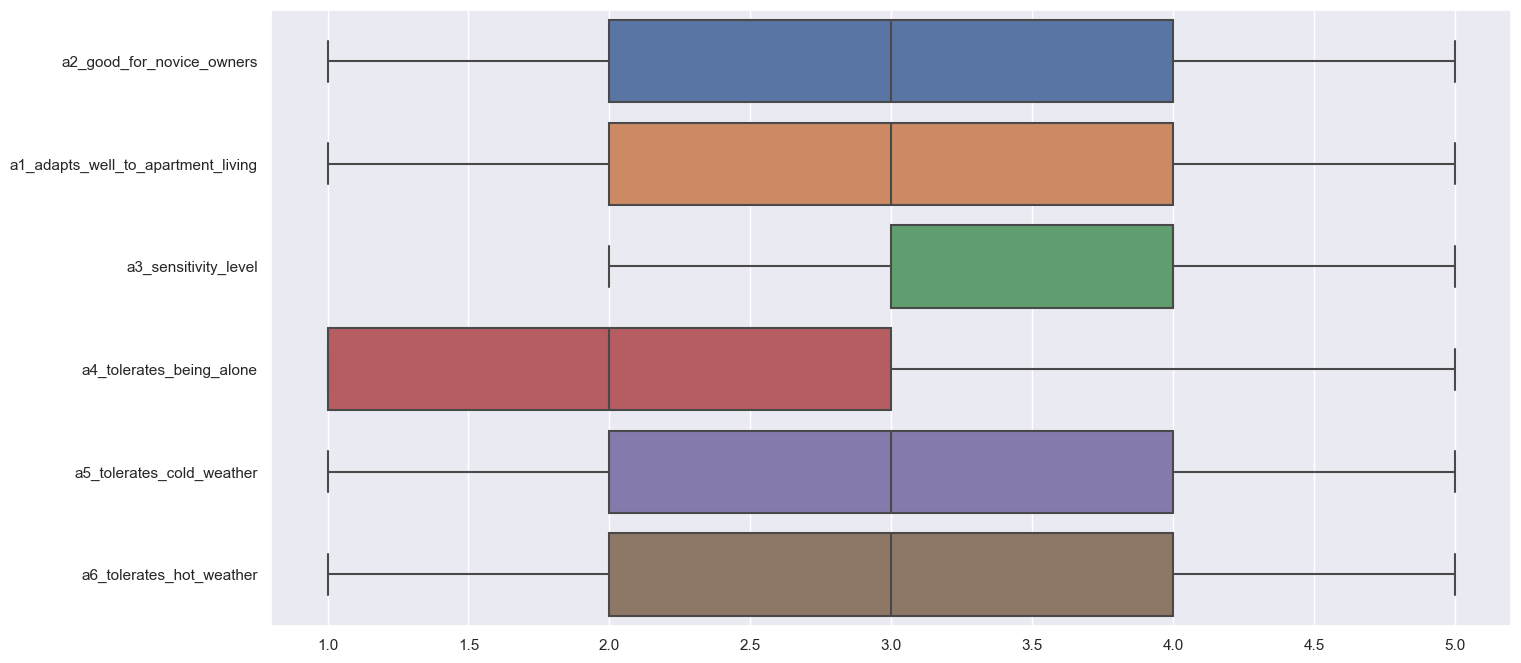

In [7]:
# Draw the Boxplots of all A variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = aDF, orient = "h")

In [8]:
# Calculate the complete  correlation matrix
aDF.corr()

,a2_good_for_novice_owners,a1_adapts_well_to_apartment_living,a3_sensitivity_level,a4_tolerates_being_alone,a5_tolerates_cold_weather,a6_tolerates_hot_weather
a2_good_for_novice_owners,1.000000,0.560221,0.099593,-0.013542,-0.207335,-0.009692
a1_adapts_well_to_apartment_living,0.560221,1.000000,0.141233,-0.020600,-0.319556,-0.094887
a3_sensitivity_level,0.099593,0.141233,1.000000,-0.325528,-0.110009,0.059455
a4_tolerates_being_alone,-0.013542,-0.020600,-0.325528,1.000000,0.096825,-0.044185
a5_tolerates_cold_weather,-0.207335,-0.319556,-0.110009,0.096825,1.000000,-0.024079
a6_tolerates_hot_weather,-0.009692,-0.094887,0.059455,-0.044185,-0.024079,1.000000


<Axes: >

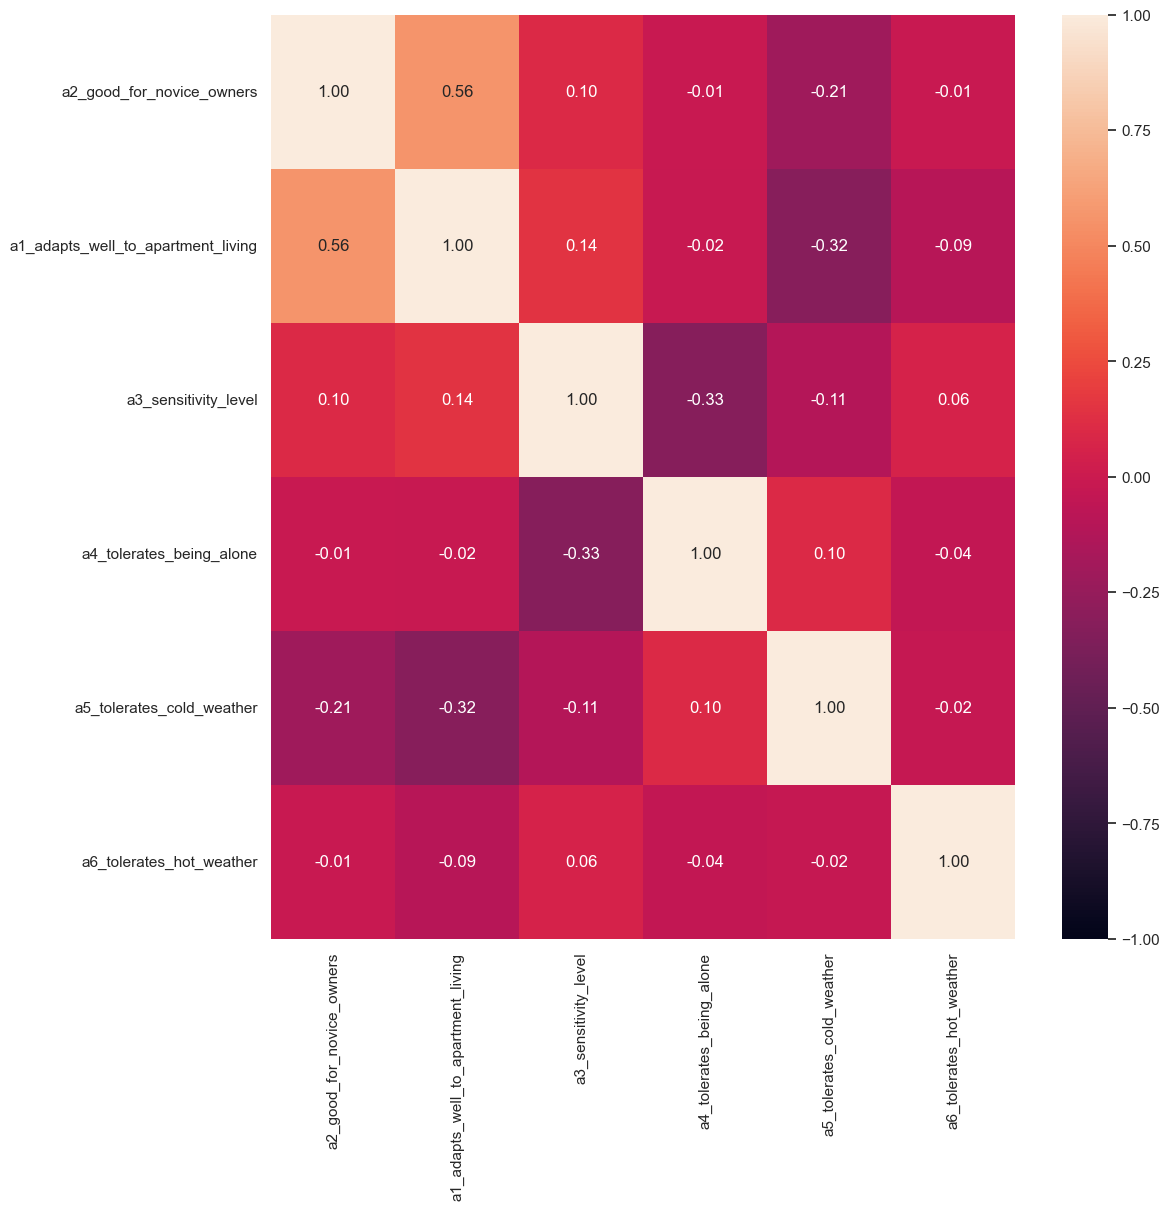

In [9]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(aDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

---
**For 'B' variables**

In [10]:
bDF = pd.DataFrame(datadf[["b1_affectionate_with_family", "b2_incredibly_kid_friendly_dogs", "b3_dog_friendly", "b4_friendly_toward_strangers"]])
# Summary Statistics for all b Variables
bDF.describe()

,b1_affectionate_with_family,b2_incredibly_kid_friendly_dogs,b3_dog_friendly,b4_friendly_toward_strangers
count,349.000000,349.00000,349.000000,349.000000
mean,4.641834,4.08596,3.495702,3.335244
std,0.577920,0.97294,1.100214,1.116461
min,2.000000,1.00000,1.000000,1.000000
25%,4.000000,4.00000,3.000000,3.000000
50%,5.000000,4.00000,4.000000,3.000000
75%,5.000000,5.00000,4.000000,4.000000
max,5.000000,5.00000,5.000000,5.000000


<Axes: >

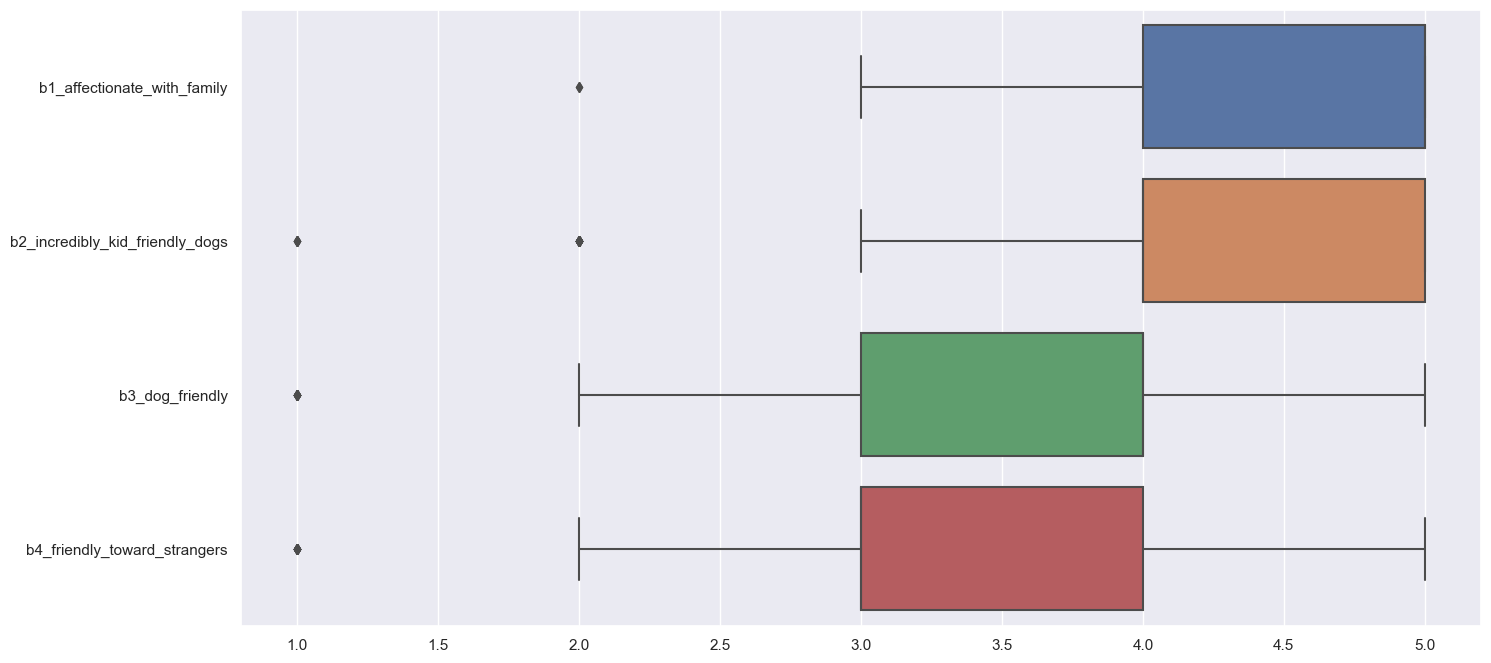

In [11]:
# Draw the Boxplots of all B variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = bDF, orient = "h")

In [12]:
novice = pd.DataFrame(data['a2_good_for_novice_owners'])   
# Create a joint dataframe by concatenating the 'novice' and bDF
jointbDF = pd.concat([novice, bDF], axis = 1).reindex(data.index)
jointbDF.corr()

,a2_good_for_novice_owners,b1_affectionate_with_family,b2_incredibly_kid_friendly_dogs,b3_dog_friendly,b4_friendly_toward_strangers
a2_good_for_novice_owners,1.000000,0.110929,0.106477,0.292999,0.246014
b1_affectionate_with_family,0.110929,1.000000,0.402429,0.270992,0.324690
b2_incredibly_kid_friendly_dogs,0.106477,0.402429,1.000000,0.521132,0.460148
b3_dog_friendly,0.292999,0.270992,0.521132,1.000000,0.526367
b4_friendly_toward_strangers,0.246014,0.324690,0.460148,0.526367,1.000000


<Axes: >

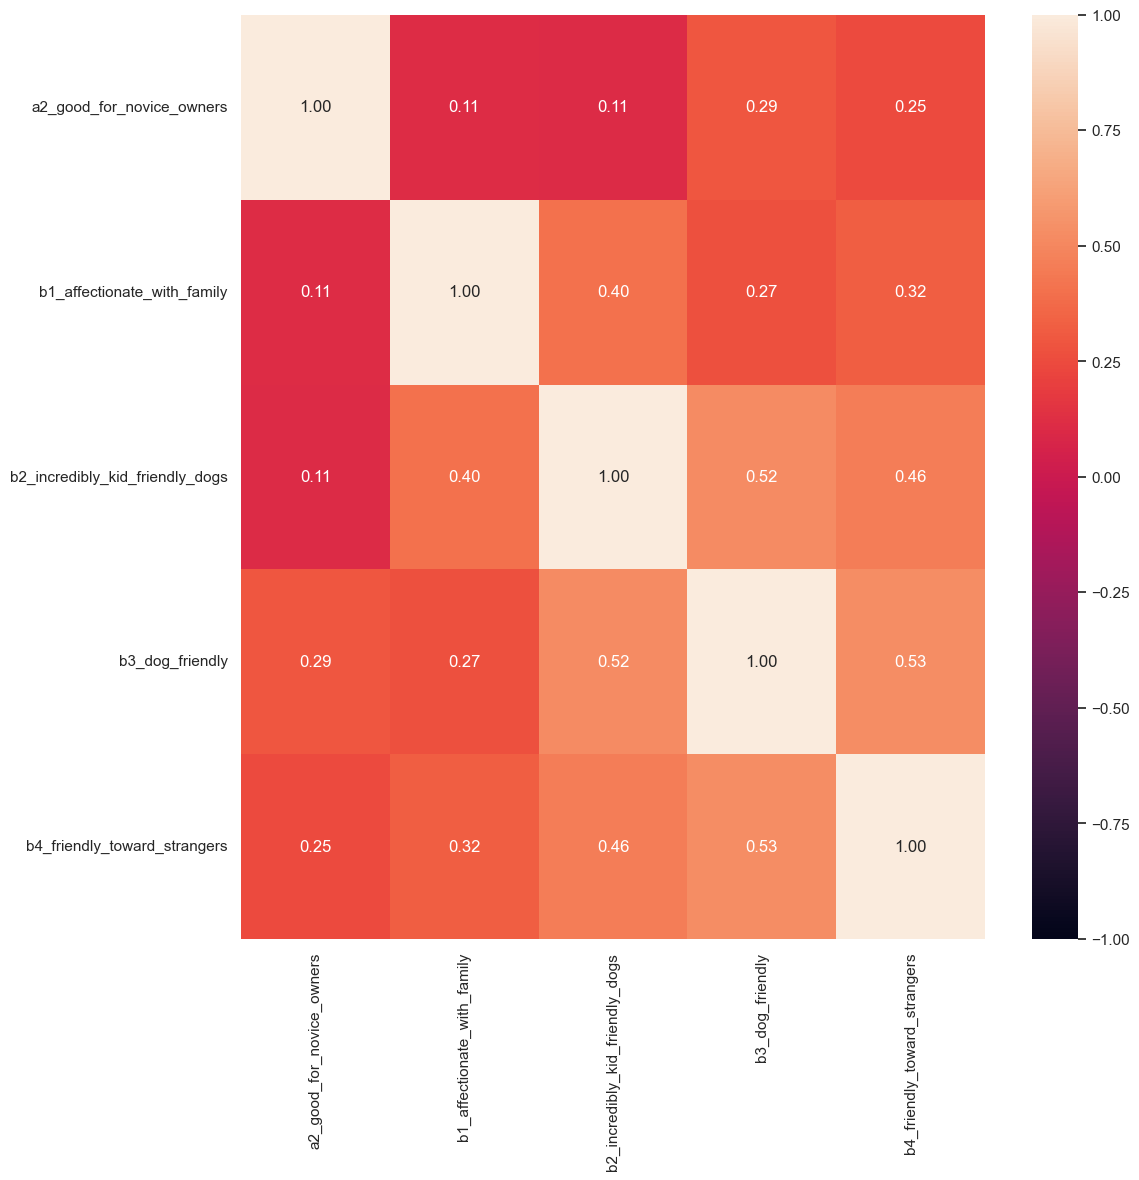

In [13]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointbDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

---
**For 'C' variables**

In [14]:
cDF = pd.DataFrame(datadf[["c1_amount_of_shedding", "c2_drooling_potential", "c3_easy_to_groom", "c4_general_health", "c5_potential_for_weight_gain", "c6_size"]])
# Summary Statistics for all C Variables
cDF.describe()

,c1_amount_of_shedding,c2_drooling_potential,c3_easy_to_groom,c4_general_health,c5_potential_for_weight_gain,c6_size
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,3.000000,1.776504,3.355301,3.478510,3.349570,2.871060
std,1.227089,1.109737,1.297591,0.927066,0.918132,1.146205
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000
50%,3.000000,1.000000,3.000000,4.000000,3.000000,3.000000
75%,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

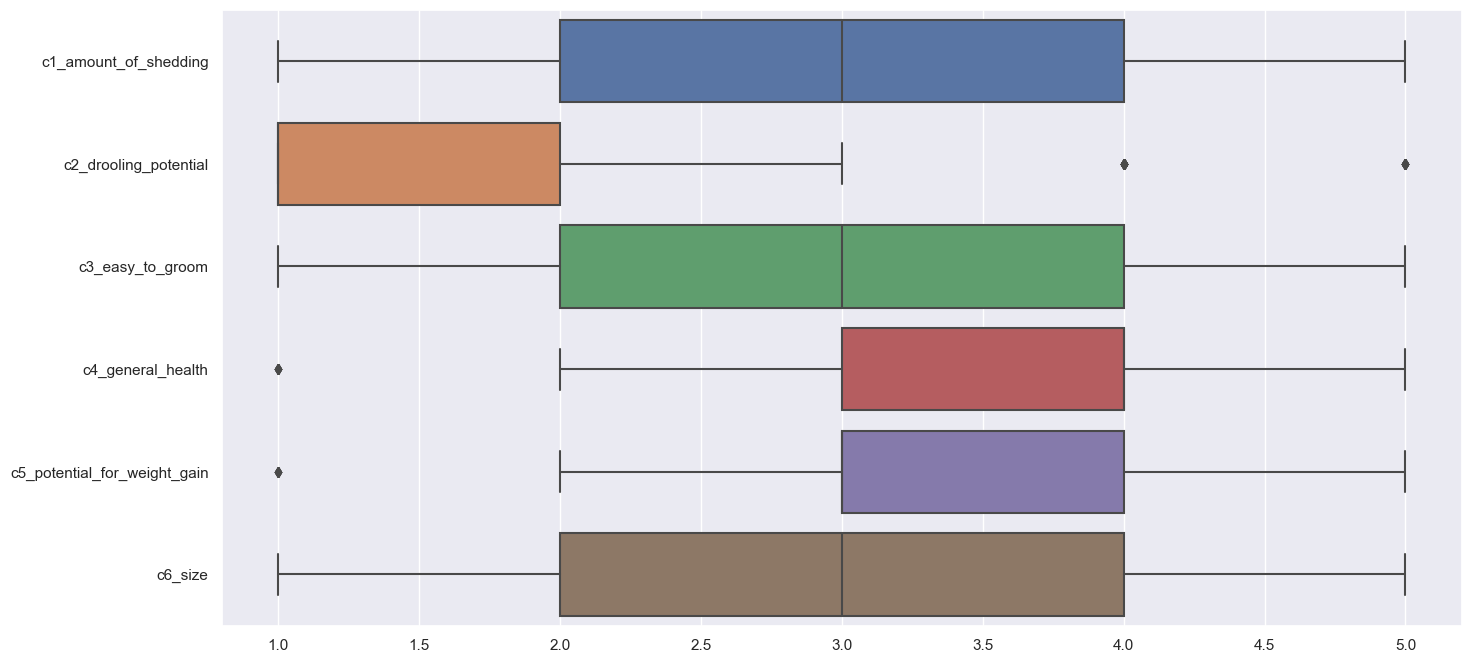

In [15]:
# Draw the Boxplots of all C variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = cDF, orient = "h")

In [16]:
# Create a joint dataframe by concatenating the 'novice' and cDF
jointcDF = pd.concat([novice, cDF], axis = 1).reindex(data.index)
jointcDF.corr()

,a2_good_for_novice_owners,c1_amount_of_shedding,c2_drooling_potential,c3_easy_to_groom,c4_general_health,c5_potential_for_weight_gain,c6_size
a2_good_for_novice_owners,1.000000,-0.208458,-0.301109,-0.087175,-0.032535,0.069870,-0.508582
c1_amount_of_shedding,-0.208458,1.000000,0.227902,0.007219,-0.146508,0.137731,0.267642
c2_drooling_potential,-0.301109,0.227902,1.000000,0.037344,-0.230925,0.175610,0.458471
c3_easy_to_groom,-0.087175,0.007219,0.037344,1.000000,0.030253,0.035344,0.048279
c4_general_health,-0.032535,-0.146508,-0.230925,0.030253,1.000000,-0.203838,-0.109433
c5_potential_for_weight_gain,0.069870,0.137731,0.175610,0.035344,-0.203838,1.000000,-0.028041
c6_size,-0.508582,0.267642,0.458471,0.048279,-0.109433,-0.028041,1.000000


<Axes: >

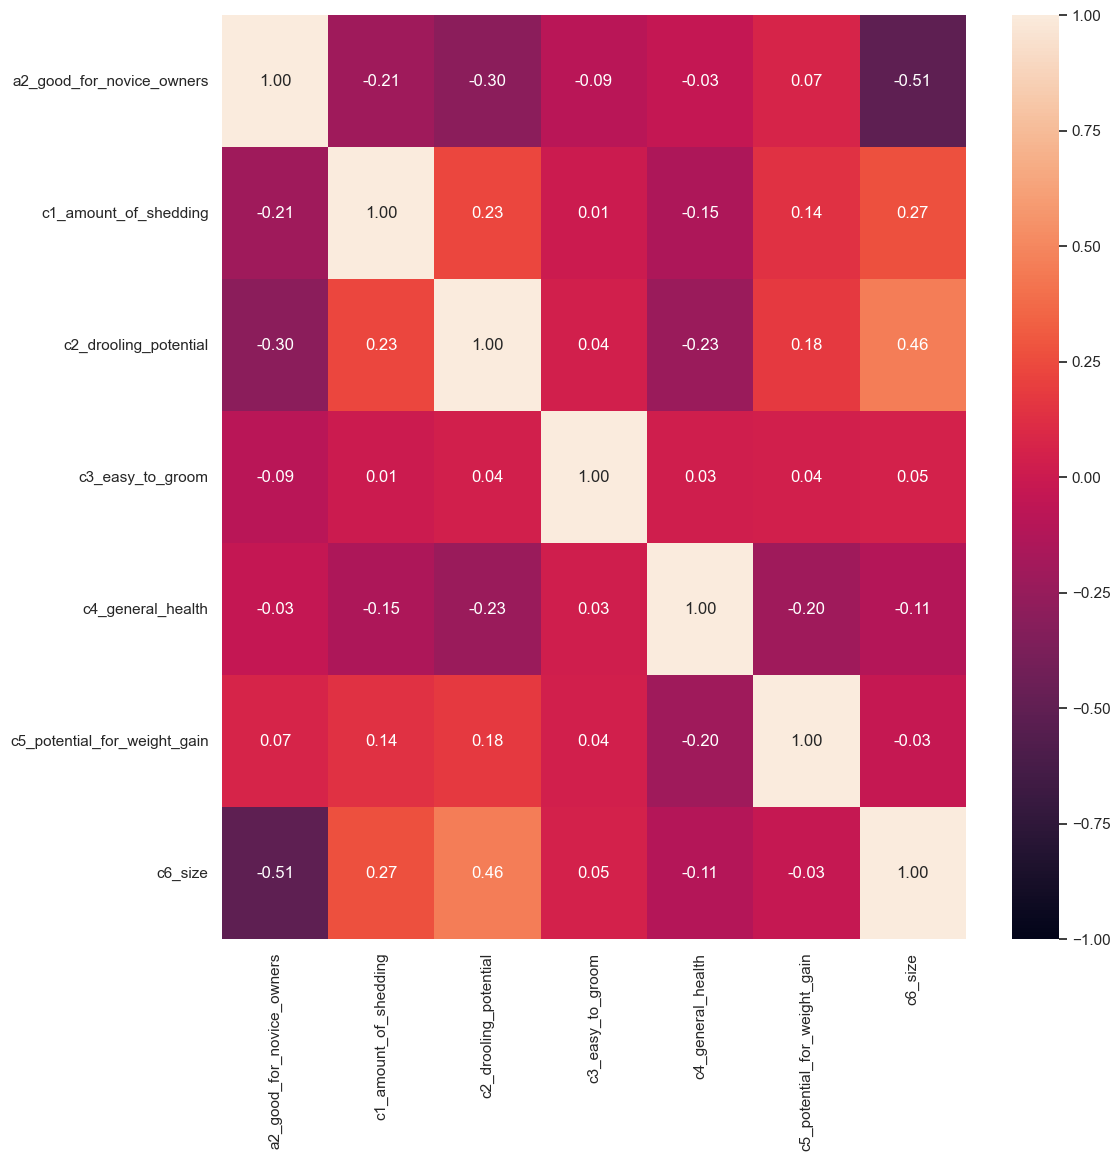

In [17]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointcDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

---

**For 'D' variables**

In [18]:
dDF = pd.DataFrame(datadf[["d1_easy_to_train", "d2_intelligence", "d3_potential_for_mouthiness", "d4_prey_drive", "d5_tendency_to_bark_or_howl", "d6_wanderlust_potential"]])
# Summary Statistics for all D Variables
dDF.describe()

,d1_easy_to_train,d2_intelligence,d3_potential_for_mouthiness,d4_prey_drive,d5_tendency_to_bark_or_howl,d6_wanderlust_potential
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,3.487106,4.077364,3.063037,3.421203,3.077364,3.209169
std,1.081708,0.721013,0.968785,1.151065,1.140819,1.205508
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

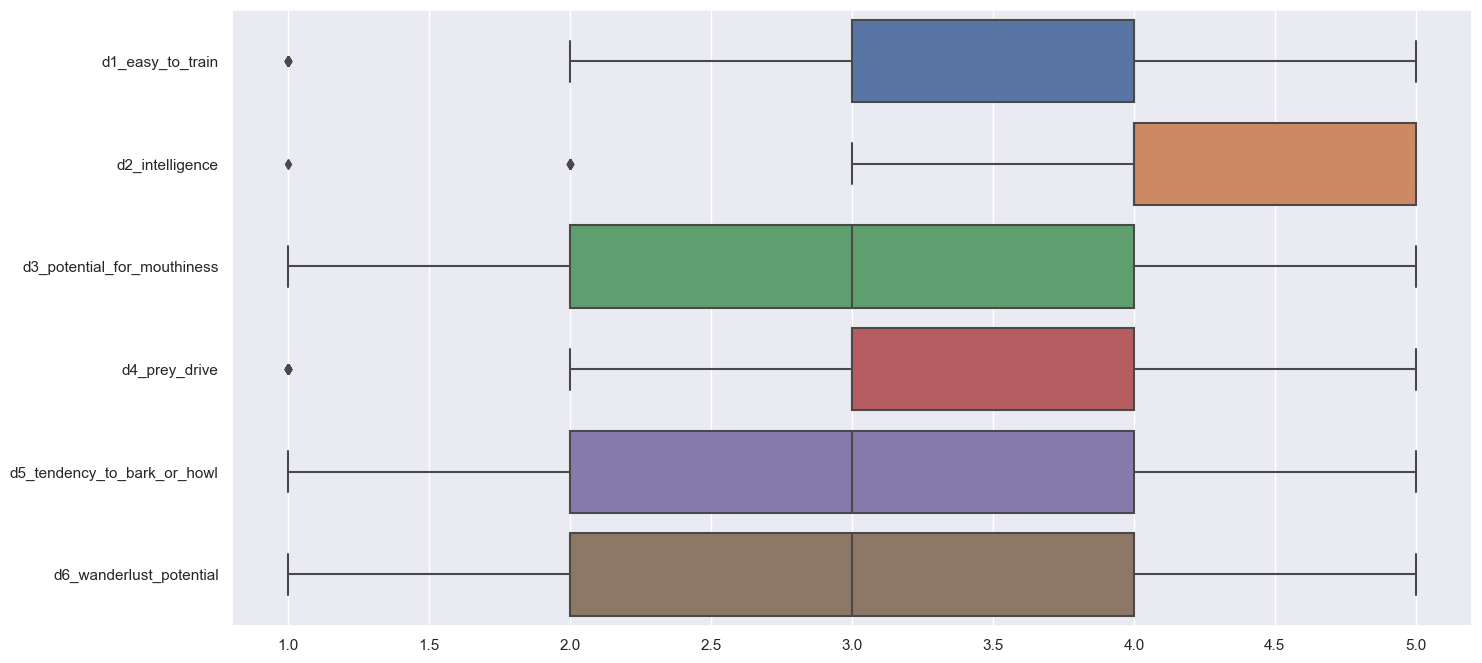

In [19]:
# Draw the Boxplots of all D variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = dDF, orient = "h")

In [20]:
# Create a joint dataframe by concatenating the 'novice' and dDF
jointdDF = pd.concat([novice, dDF], axis = 1).reindex(data.index)
jointdDF.corr()

,a2_good_for_novice_owners,d1_easy_to_train,d2_intelligence,d3_potential_for_mouthiness,d4_prey_drive,d5_tendency_to_bark_or_howl,d6_wanderlust_potential
a2_good_for_novice_owners,1.000000,0.211637,-0.039965,-0.161983,-0.143348,-0.038071,-0.188797
d1_easy_to_train,0.211637,1.000000,0.364197,0.055620,-0.038321,-0.095826,-0.067340
d2_intelligence,-0.039965,0.364197,1.000000,0.058820,0.147594,-0.021271,0.169773
d3_potential_for_mouthiness,-0.161983,0.055620,0.058820,1.000000,0.236386,0.167176,0.141229
d4_prey_drive,-0.143348,-0.038321,0.147594,0.236386,1.000000,0.141423,0.375348
d5_tendency_to_bark_or_howl,-0.038071,-0.095826,-0.021271,0.167176,0.141423,1.000000,0.199235
d6_wanderlust_potential,-0.188797,-0.067340,0.169773,0.141229,0.375348,0.199235,1.000000


<Axes: >

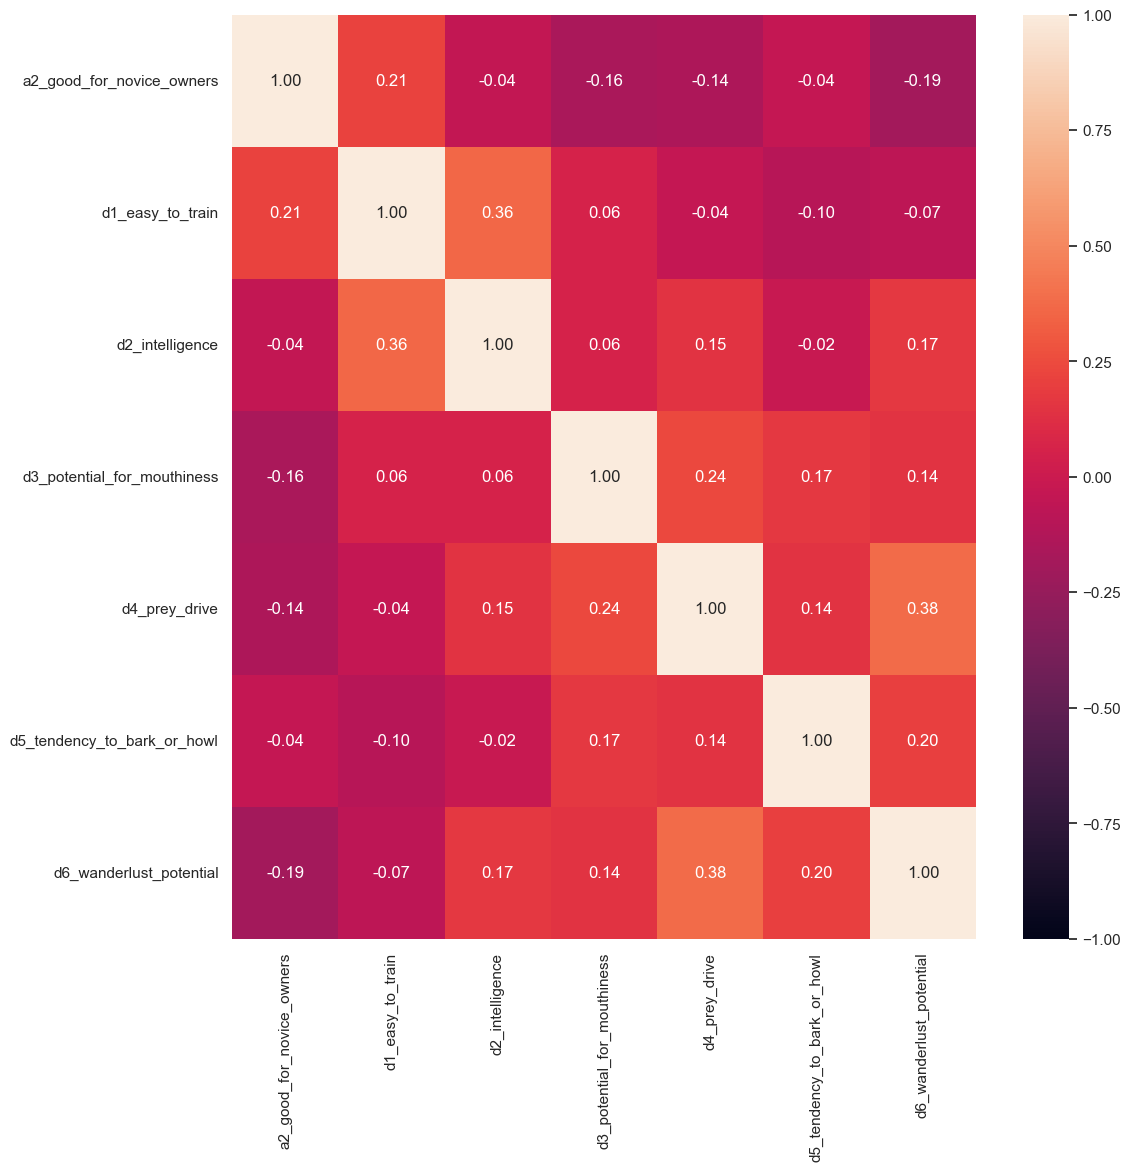

In [21]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointdDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

---
**For "E" Variable**

In [22]:
eDF = pd.DataFrame(datadf[["e1_energy_level", "e2_intensity", "e3_exercise_needs", "e4_potential_for_playfulness"]])
# Summary Statistics for all E Variables
eDF.describe()

,e1_energy_level,e2_intensity,e3_exercise_needs,e4_potential_for_playfulness
count,349.000000,349.000000,349.000000,349.000000
mean,4.091691,3.297994,3.988539,4.346705
std,0.882567,1.010020,0.958858,0.756293
min,2.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,4.000000
50%,4.000000,3.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


<Axes: >

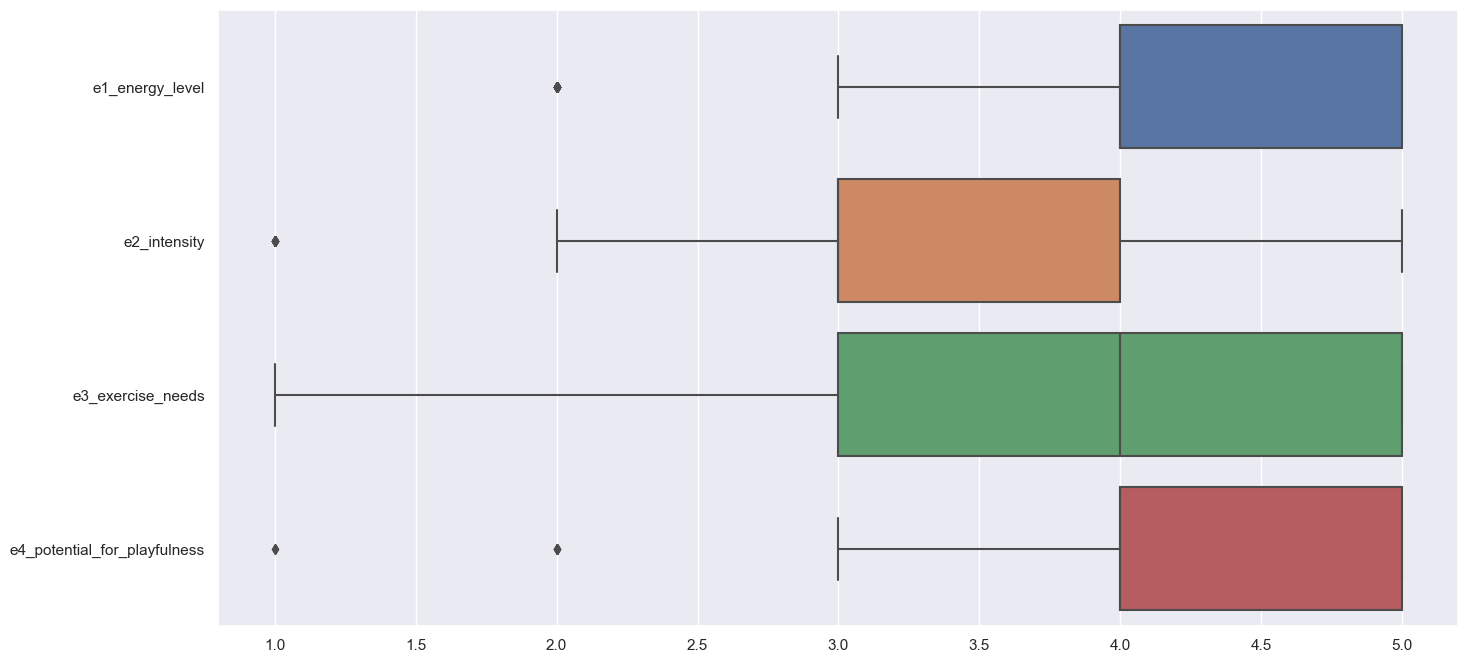

In [23]:
# Draw the Boxplots of all E variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = eDF, orient = "h")

In [24]:
# Create a joint dataframe by concatenating the 'novice' and eDF
jointeDF = pd.concat([novice, eDF], axis = 1).reindex(data.index)
jointeDF.corr()

,a2_good_for_novice_owners,e1_energy_level,e2_intensity,e3_exercise_needs,e4_potential_for_playfulness
a2_good_for_novice_owners,1.000000,-0.196646,-0.315446,-0.351809,0.103770
e1_energy_level,-0.196646,1.000000,0.433461,0.707534,0.447323
e2_intensity,-0.315446,0.433461,1.000000,0.448606,0.312018
e3_exercise_needs,-0.351809,0.707534,0.448606,1.000000,0.346276
e4_potential_for_playfulness,0.103770,0.447323,0.312018,0.346276,1.000000


<Axes: >

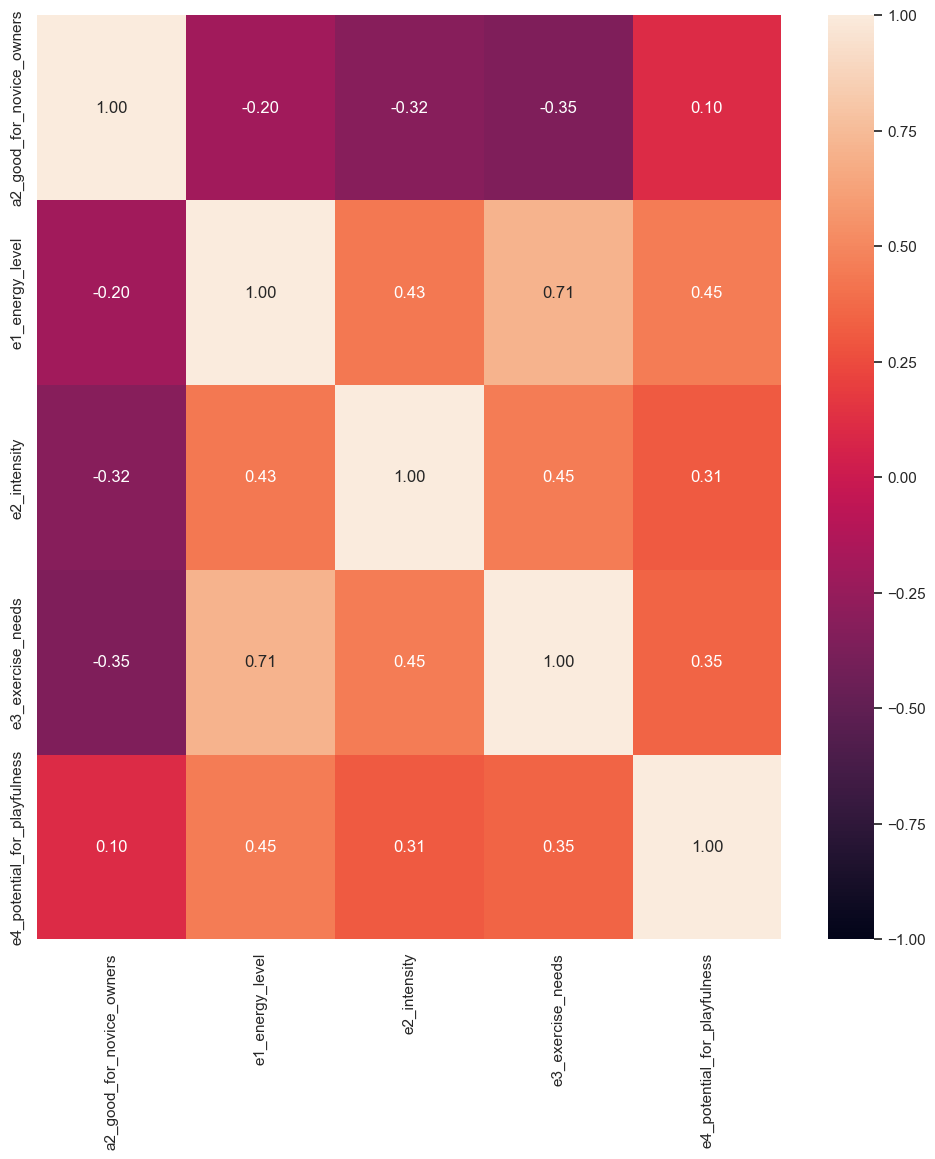

In [25]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointeDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

---
As for the other 4 variables: `"breed_group"`, `"height"` , `"weight"` and `"life_span"` their data type are `object`, more needs to be done to process these variables

In [26]:
otherVariables = data[['breed_group', 'height', 'weight', 'life_span']].copy()

#pd.set_option('display.max_rows', None)  # This will allow all rows to be displayed.
#pd.set_option('display.max_columns', None)  # This will allow all columns to be displayed.
#pd.set_option('display.width', None)  # This aims to ensure that the display is not truncated horizontally.
#pd.set_option('display.max_colwidth', None)  # This will allow the full width of column data to be displayed.

otherVariables

,breed_group,height,weight,life_span
0,Mixed Breed Dogs,20 to 29 inches,50 to 75 pounds,10 to 12 years
1,Mixed Breed Dogs,6 to 12 inches,4 to 12 pounds,13 to 18 years
2,Companion Dogs,9 inches to 11 inches tall at the shoulder,7 to 9 pounds,12 to 14 years
3,Hound Dogs,"2 feet to 2 feet, 4 inches tall at the shoulder",50 to 60 pounds,10 to 12 years
4,Terrier Dogs,"1 foot, 9 inches to 1 foot, 11 inches tall at ...",40 to 65 pounds,10 to 13 years
...,...,...,...,...
344,Mixed Breed Dogs,12 to 20 inches,20 to 45 pounds,12 to 15 years
345,Sporting Dogs,"1 foot, 8 inches to 2 feet tall at the shoulder",50 to 60 pounds,10 to 14 years
346,Companion Dogs,"1 foot, 6 inches to 1 foot, 11 inches tall at ...",10 to 50 pounds,14 to 20 years
347,Hybrid Dogs,"7 inches to 1 foot, 3 inches tall at the shoulder",3 to 14 pounds,10 to 15 years


From looking at the data, we can see that `"breed_group"` is a categorical variabale while `"height"` , `"weight"` and `"life_span"` are all numerical variables but they are displayed as a range rather than a specific numerical value.

As such, we have decided to split each of the three variables into 2, namely min and max of the particular variable.

In [27]:
# Split the weight column into min_weight and max_weight
def process_weight_column(df, column_name):
    weight_split = df[column_name].str.extract(r'(\d+)\s+to\s+(\d+)')
    df['min_weight'] = pd.to_numeric(weight_split[0], errors='coerce')
    df['max_weight'] = pd.to_numeric(weight_split[1], errors='coerce')

    # Handle special cases like 'Up to X pounds' and 'Starts at X pounds'
    up_to = df[column_name].str.extract(r'Up to (\d+)')
    starts_at = df[column_name].str.extract(r'Starts at (\d+)')
    
    # Apply the extracted values appropriately
    df.loc[up_to[0].notnull(), 'min_weight'] = 1  # Assuming 1 pound as a realistic minimum
    df.loc[up_to[0].notnull(), 'max_weight'] = pd.to_numeric(up_to[0], errors='coerce')
    
    df.loc[starts_at[0].notnull(), 'min_weight'] = pd.to_numeric(starts_at[0], errors='coerce')
    df.loc[starts_at[0].notnull(), 'max_weight'] = pd.NA

    # Replace NaN values with the column's average
    min_weight_avg = df['min_weight'].mean()
    max_weight_avg = df['max_weight'].mean()
    df['min_weight'] = df['min_weight'].fillna(min_weight_avg)
    df['max_weight'] = df['max_weight'].fillna(max_weight_avg)

    return df

process_weight_column(otherVariables, 'weight')

otherVariables[['weight', 'min_weight', 'max_weight']]

,weight,min_weight,max_weight
0,50 to 75 pounds,50.0,75.0
1,4 to 12 pounds,4.0,12.0
2,7 to 9 pounds,7.0,9.0
3,50 to 60 pounds,50.0,60.0
4,40 to 65 pounds,40.0,65.0
...,...,...,...
344,20 to 45 pounds,20.0,45.0
345,50 to 60 pounds,50.0,60.0
346,10 to 50 pounds,10.0,50.0
347,3 to 14 pounds,3.0,14.0


In [28]:
# Split the height column into min_height and max_height
import re

def process_height_column(df, column_name):
    def parse_height_to_inches(height_str):
        """
        Converts a height string into inches.
        Handles single values, ranges, and phrases with 'Up to' or 'From'.
        Sets min_height to 1 if 'Up to' is found, uses the actual value for 'From',
        and calculates range if 'to' is present.
        """
        if pd.isna(height_str):
            return None, None

        # Identify if the string contains 'Up to', 'From', or a range indicated by 'to'
        up_to_match = re.search(r'up to', height_str, re.IGNORECASE)
        from_match = re.search(r'from', height_str, re.IGNORECASE)
        to_match = re.search(r'to', height_str, re.IGNORECASE)

        # Initialize min_height and max_height
        min_height, max_height = None, None

        # Function to parse height in inches from a given string part
        def get_inches(part):
            inches_total = 0
            for num in re.finditer(r'(\d+)\s*(foot|feet|inch|inches)?', part, re.IGNORECASE):
                value, unit = int(num.group(1)), num.group(2)
                if unit and ('foot' in unit or 'feet' in unit):
                    inches_total += value * 12
                else:
                    inches_total += value
            return inches_total

        # Process based on the identified keywords
        if up_to_match:
            max_height = get_inches(height_str[up_to_match.end():].strip())
            min_height = 1
        elif from_match:
            min_height = get_inches(height_str[from_match.end():].strip())
            max_height = None  # Set to None as we only have minimum
        elif to_match:
            parts = height_str.split('to')
            min_height = get_inches(parts[0].strip())
            max_height = get_inches(parts[1].strip())
        else:
            min_height = max_height = get_inches(height_str)

        return min_height, max_height

    # Apply the function to each row in the height column
    heights = df[column_name].apply(parse_height_to_inches)
    df['min_height'], df['max_height'] = zip(*heights)

    return df

process_height_column(otherVariables, 'height')

otherVariables[['height', 'min_height', 'max_height']]

,height,min_height,max_height
0,20 to 29 inches,20.0,29.0
1,6 to 12 inches,6.0,12.0
2,9 inches to 11 inches tall at the shoulder,9.0,11.0
3,"2 feet to 2 feet, 4 inches tall at the shoulder",24.0,28.0
4,"1 foot, 9 inches to 1 foot, 11 inches tall at ...",21.0,23.0
...,...,...,...
344,12 to 20 inches,12.0,20.0
345,"1 foot, 8 inches to 2 feet tall at the shoulder",20.0,24.0
346,"1 foot, 6 inches to 1 foot, 11 inches tall at ...",18.0,23.0
347,"7 inches to 1 foot, 3 inches tall at the shoulder",7.0,15.0


In [29]:
# Split the lifespan column into min_lifespan and max_lifespan
def process_lifespan_column(df, column_name):
    def parse_lifespan_to_years(lifespan_str):
        """
        Converts a lifespan string into min and max years.
        Handles single values and ranges, and phrases with 'Up to'.
        Sets min_life_span to 1 if 'Up to' is found, and calculates max_life_span based on the value provided.
        """
        if pd.isna(lifespan_str):
            return None, None

        # Check for 'Up to' at the beginning of the string
        up_to_match = re.match(r'up to', lifespan_str, re.IGNORECASE)

        # Initialize min_life_span and max_life_span
        min_life_span, max_life_span = None, None

        # Calculate years from the lifespan string
        def get_years(part):
            years = 0
            match = re.search(r'(\d+)', part)
            if match:
                years = int(match.group(1))
            return years

        if up_to_match:
            # Only max_life_span is defined after "Up to"
            min_life_span = 1
            max_life_span = get_years(lifespan_str[up_to_match.end():].strip())
        else:
            # If there is no "Up to", process normally
            parts = lifespan_str.split('to')
            min_life_span = get_years(parts[0].strip())
            max_life_span = get_years(parts[1].strip()) if len(parts) > 1 else min_life_span

        return min_life_span, max_life_span

    # Apply the function to each row in the lifespan column
    lifespans = df[column_name].apply(parse_lifespan_to_years)
    df['min_life_span'], df['max_life_span'] = zip(*lifespans)

    return df

process_lifespan_column(otherVariables, "life_span")
otherVariables[['life_span', 'min_life_span', 'max_life_span']]

,life_span,min_life_span,max_life_span
0,10 to 12 years,10,12
1,13 to 18 years,13,18
2,12 to 14 years,12,14
3,10 to 12 years,10,12
4,10 to 13 years,10,13
...,...,...,...
344,12 to 15 years,12,15
345,10 to 14 years,10,14
346,14 to 20 years,14,20
347,10 to 15 years,10,15


In [30]:
#Manual Cleaning of some data, as the functions used to clean the data is good but not perfect,
#it is only possible because our dataset is not that big,
otherVariables.loc[146, 'max_weight'] = "Nan"
otherVariables['max_weight'] = pd.to_numeric(otherVariables['max_weight'], errors='coerce')
otherVariables.loc[216, 'min_weight'] = 35.0
otherVariables.loc[216, 'max_weight'] = 60.0
otherVariables.loc[48, 'min_height'] = 10.0
otherVariables.loc[48, 'max_height'] = 29.0
otherVariables.loc[216, 'min_height'] = 18.5
otherVariables.loc[250, 'min_height'] = 10.0
otherVariables.loc[216, 'max_height'] = 21
otherVariables.loc[314, 'max_height'] = 23.5
otherVariables.loc[30, 'min_life_span'] = 1.0
otherVariables

,breed_group,height,weight,life_span,min_weight,max_weight,min_height,max_height,min_life_span,max_life_span
0,Mixed Breed Dogs,20 to 29 inches,50 to 75 pounds,10 to 12 years,50.0,75.0,20.0,29.0,10,12
1,Mixed Breed Dogs,6 to 12 inches,4 to 12 pounds,13 to 18 years,4.0,12.0,6.0,12.0,13,18
2,Companion Dogs,9 inches to 11 inches tall at the shoulder,7 to 9 pounds,12 to 14 years,7.0,9.0,9.0,11.0,12,14
3,Hound Dogs,"2 feet to 2 feet, 4 inches tall at the shoulder",50 to 60 pounds,10 to 12 years,50.0,60.0,24.0,28.0,10,12
4,Terrier Dogs,"1 foot, 9 inches to 1 foot, 11 inches tall at ...",40 to 65 pounds,10 to 13 years,40.0,65.0,21.0,23.0,10,13
...,...,...,...,...,...,...,...,...,...,...
344,Mixed Breed Dogs,12 to 20 inches,20 to 45 pounds,12 to 15 years,20.0,45.0,12.0,20.0,12,15
345,Sporting Dogs,"1 foot, 8 inches to 2 feet tall at the shoulder",50 to 60 pounds,10 to 14 years,50.0,60.0,20.0,24.0,10,14
346,Companion Dogs,"1 foot, 6 inches to 1 foot, 11 inches tall at ...",10 to 50 pounds,14 to 20 years,10.0,50.0,18.0,23.0,14,20
347,Hybrid Dogs,"7 inches to 1 foot, 3 inches tall at the shoulder",3 to 14 pounds,10 to 15 years,3.0,14.0,7.0,15.0,10,15


In [31]:
#Extracting only the relevant coloumns that is required
modified_df = pd.DataFrame(otherVariables[['min_weight', 'max_weight', 'min_height', 'max_height', 'min_life_span', 'max_life_span']])
modified_df.describe()

,min_weight,max_weight,min_height,max_height,min_life_span,max_life_span
count,349.000000,348.000000,349.000000,343.000000,349.000000,349.000000
mean,35.699744,59.386384,15.889685,20.450437,10.893983,14.106017
std,26.458603,42.333600,6.211086,6.543078,1.578481,1.709572
min,1.000000,6.000000,1.000000,8.000000,1.000000,8.000000
25%,13.000000,25.000000,10.000000,15.000000,10.000000,13.000000
50%,35.000000,55.000000,16.000000,21.000000,11.000000,15.000000
75%,50.000000,80.000000,21.000000,26.000000,12.000000,15.000000
max,140.000000,220.000000,32.000000,36.000000,15.000000,20.000000


In [32]:
# Create a joint dataframe by concatenating the 'novice' and otherVariables
jointotherDF = pd.concat([novice, modified_df], axis = 1).reindex(data.index)
jointotherDF.corr()

,a2_good_for_novice_owners,min_weight,max_weight,min_height,max_height,min_life_span,max_life_span
a2_good_for_novice_owners,1.000000,-0.503546,-0.482115,-0.480487,-0.519706,0.192384,0.261271
min_weight,-0.503546,1.000000,0.925033,0.823351,0.825642,-0.480268,-0.595570
max_weight,-0.482115,0.925033,1.000000,0.773290,0.842104,-0.478397,-0.549603
min_height,-0.480487,0.823351,0.773290,1.000000,0.907288,-0.302062,-0.457061
max_height,-0.519706,0.825642,0.842104,0.907288,1.000000,-0.351675,-0.448119
min_life_span,0.192384,-0.480268,-0.478397,-0.302062,-0.351675,1.000000,0.623928
max_life_span,0.261271,-0.595570,-0.549603,-0.457061,-0.448119,0.623928,1.000000


<Axes: >

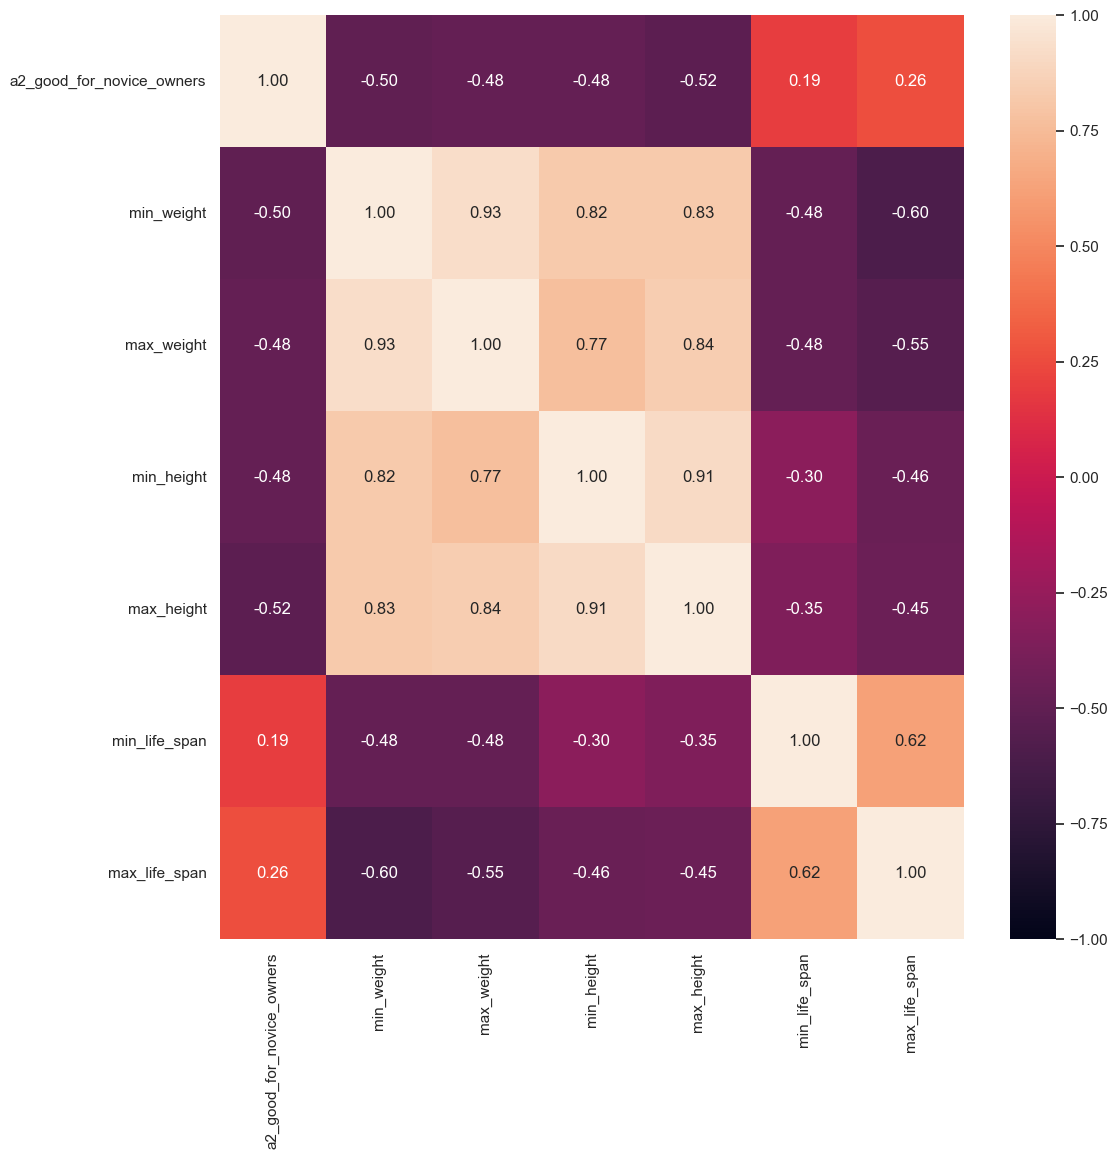

In [33]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointotherDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Based on all the correlation coefficient as displayed above, we found that the nine variables with the high correlation with `a2_good_for_novice_owners` are the following

1. `a1_adapts_well_to_apartment_living` :0.56
2. `c6_size` :-0.51
3. `e3_exercise_needs` :0.35
4. `e2_intensity` :0.32
5. `c2_drooling_potential`:0.3
6. `b3_dog_friendly` :0.29
7. `b4_friendly_toward_strangers` :0.25
8. `d1_easy_to_train` :0.21
9. `a5_tolerates_cold_weather` :0.21

---
# Part 2: Creating Multi-variate Classification Model

As our questions is to predict which dog breeds are good novice owners given the attributes, this is a classification problem with the following response variable and predicator features

`Response Variable`: **'a2_good_for_novice_owners'** 

`Predictor Feature`: **a1, a5, b3, b4, c2, c6, d1, e2, e3**

## Building a Model using a Multilayer Layer Perceptron

It is a type of artificial neural network used in machine learning
It solves the classification problem throught the following steps:

1. Input Layer: Recieves the features with each node in the layer representing one feature, in this case since we have a total of 9 nodes since we have 9 predictorr features

2. Hidden layers: With each node in a hidden layer connected to every node in the previous layer and has its own set of weights. In this case, we have set the hidden layer to 100

3. Activation Function: Each node in the hidden layers and the output layers applies an activation function to the weighted sum of its inputs. For this problem we are using ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

4. Output layer: Produces the final classfications, which convers the raw output into probabilities for each class. Class with the highest probability is then selected as the predicted class.

We have choose to use MLP as its ability to learn complex relationships through hidden layers and non-linear activation functions makes it effective at solving classification problems.

In [34]:
##MLP Model
import sklearn.neural_network as sknet
import sklearn.model_selection as skmodel


# Extract Response and Predictors
y = data["a2_good_for_novice_owners"].values  # Directly as NumPy array
X = pd.DataFrame(data[["a1_adapts_well_to_apartment_living", "a5_tolerates_cold_weather", "b3_dog_friendly", "b4_friendly_toward_strangers", "c2_drooling_potential", "c6_size", "d1_easy_to_train", "e2_intensity", "e3_exercise_needs"]])  # predictors 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size = 0.25, random_state = 5)

model = sknet.MLPClassifier(hidden_layer_sizes=(100), random_state=1, max_iter=10000)
                            

model.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
print("Accuracy on training set: {:.2%}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2%}".format(model.score(X_test, y_test)))

Accuracy on training set: 74.33%
Accuracy on test set: 40.91%


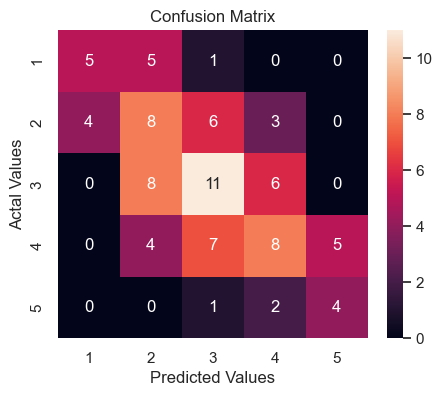

In [35]:
import sklearn.metrics as skmet

cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_test_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'], 
                     columns = ['1', '2', '3', '4', '5'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
print("Train Set: ")
print(skmet.classification_report(y_train,y_train_pred))
print("Test Set: ")
print(skmet.classification_report(y_test,y_test_pred))

Train Set: 
              precision    recall  f1-score   support

           1       0.90      0.76      0.83        34
           2       0.77      0.79      0.78        77
           3       0.66      0.77      0.71        66
           4       0.69      0.68      0.68        59
           5       0.89      0.64      0.74        25

    accuracy                           0.74       261
   macro avg       0.78      0.73      0.75       261
weighted avg       0.75      0.74      0.74       261

Test Set: 
              precision    recall  f1-score   support

           1       0.56      0.45      0.50        11
           2       0.32      0.38      0.35        21
           3       0.42      0.44      0.43        25
           4       0.42      0.33      0.37        24
           5       0.44      0.57      0.50         7

    accuracy                           0.41        88
   macro avg       0.43      0.44      0.43        88
weighted avg       0.42      0.41      0.41        88


**Precision:**

- Precision measures the accuracy of the positive predictions made by the model. It is calculated as the ratio of true positive predictions to the total number of positive predictions made by the model.
- Formula: Precision = True Positives / (True Positives + False Positives)
- High precision indicates that the model's positive predictions are mostly correct, with fewer false positives.

**Recall (Sensitivity):**
- Recall measures the model's ability to correctly identify all positive instances in the dataset. It is calculated as the ratio of true positive predictions to the total number of actual positive instances.
- Formula: Recall = True Positives / (True Positives + False Negatives)
- High recall indicates that the model can capture a large proportion of the actual positive instances, with fewer false negatives.

**F1-Score:**
- The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, making it useful for evaluating a model's overall performance.
- Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
- The F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.

**Support:**
- Support refers to the number of actual occurrences of each class in the dataset. It is the number of samples in each class that are correctly classified.
- Support is used to provide context to precision, recall, and F1-score by showing how many instances of each class were correctly predicted by the model.

From the classification report, we can see a huge discrepency between the accuracy on the training set and the test set, this could be due to overfitting of data during the training of the model. This overfitting may have arised because of our relatively small sample size.

As such, we have decided to see if using other classification models will help us get a better accuracy.

---

## Building a Model using RandomForest

It operates by constucting multiple decision trees during training and outputs the class that is the mode of the classess or the average prediction of the individual trees.

It works through the following steps:
1. Random Sampling: Random Forest starts by randomly selecting a subset of the training data(with replacement) to build each decision tree. This process is known as bootstrapping or bagging

2. Feature Randomness: Random Forest also introduces randomness in feature selection for each node of the decision trees. 

3. Decision Tree Construction: Using bootstrapped samplesand random feature subsets. Random Forest constructs multiple decision trees in parallel. Each decision tree is grown recursively by selecting the best split at each node based on a criterion such as Gini purity

4. After constructing all the decision trees, Random Forst combines their pridictoios to make the final classification.

In [37]:
##RandomForest Model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'log_loss', random_state = 4)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Accuracy
print("Accuracy on training set: {:.2%}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.2%}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 100.00%
Accuracy on test set: 43.18%


In [38]:
#Modules to install to visuaise the random forest tree
!pip install graphviz
!pip install pydotplus  # Install pydotplu

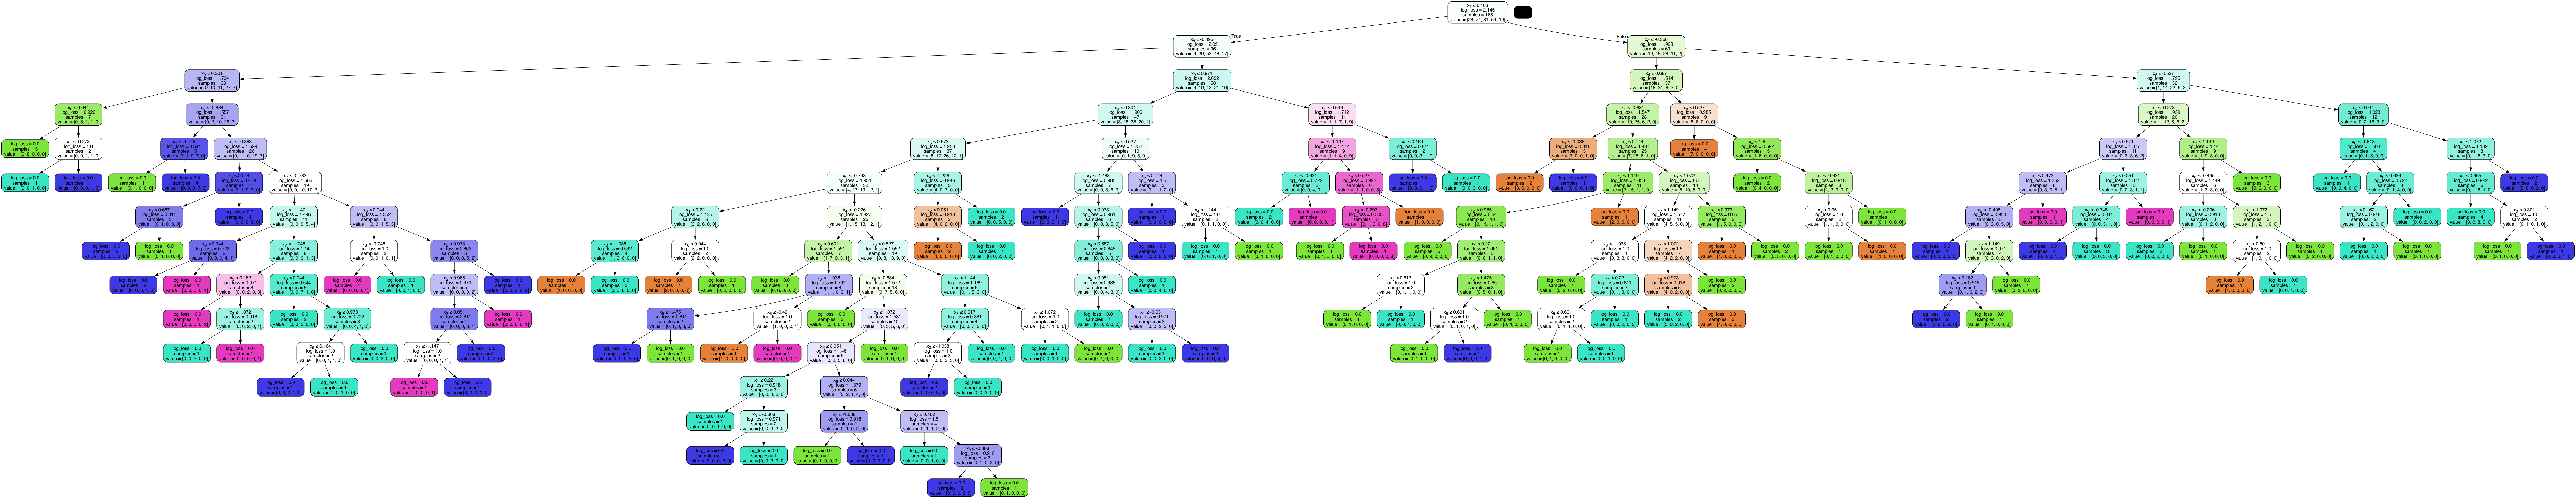

In [39]:
#Libraries to import to visualise the random forest tree
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus  # Import pydotplus

# Select a tree from the Random Forest (e.g., the first tree)
tree = classifier.estimators_[0]

# Export the tree to a DOT file
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Set the size of the tree visualization (optional)
graph.set_size('"1000,10000"')

# Visualize the tree
display(Image(graph.create_png()))

## Building a Model using a decision Tree

A decision tree operates by recursively splitting the dataset based on the values of input features, ultimately predicting the target variable at the leaf nodes. It follows these steps:

1. Feature Selection: The decision tree starts by selecting the best feature from the dataset to split the data into subsets. It evaluates features based on criteria like Gini impurity, aiming to maximize the purity of subsets or minimize uncertainty.

2. Splitting Nodes: Each node in the tree represents a decision based on a feature value. The dataset is divided into subsets at each node according to the feature's values 

3. Recursive Splitting: The splitting process continues recursively for each subset until certain stopping criteria are met (e.g., maximum depth, minimum samples per leaf). At each node, the algorithm selects the best feature to split the data, creating branches based on different conditions.

4. Leaf Nodes and Predictions: When a stopping criterion is reached or a subset becomes pure (contains only one class), it becomes a leaf node. Each leaf node represents a final prediction or decision (e.g., 'This is an apple').

5. Model Interpretability: Decision trees are interpretable as they represent a series of simple 'if-else' rules. You can visualize a decision tree as a flowchart, making it easy to understand and explain how predictions are made.

6. Handling New Data: To predict the target variable for new data, you start at the root node and follow the path of feature values down the tree until reaching a leaf node, which provides the final prediction.

In [40]:
##Multi-variate Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy(in %) \t:", dectree.score(X_train, y_train)*100)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy(in %) \t:", dectree.score(X_test, y_test)*100)
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy(in %) 	: 57.8544061302682

Goodness of Fit of Model 	Test Dataset
Classification Accuracy(in %) 	: 44.31818181818182



In [41]:
# Plot Decision Tree
plt.figure(figsize=(100, 100))
plot_tree(dectree, feature_names=X.columns.tolist(), filled=True)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 10000x10000 with 0 Axes>

## Building a Model using Gaussian Naive Bayes

Gaussian Naive Bayes is a probabilistic classification algorithm that operates by assuming features are independent and follow a Gaussian (normal) distribution within each class. It follows these steps:

1. Assumption of Independence: Gaussian Naive Bayes assumes that the features in the dataset are independent of each other given the class label. This means that the presence or absence of a particular feature does not affect the presence or absence of other features.

2. Model Training: During training, the algorithm calculates the mean and standard deviation of each feature for each class in the training data. These statistics are used to model the Gaussian distribution of features within each class.

3. Bayesian Probability Calculation: To make predictions for new instances, Gaussian Naive Bayes applies Bayes' theorem, which calculates the conditional probability of a class given the features
4. Decision Making: The algorithm selects the class with the highest posterior probability (probability after observing the features) as the predicted class for the new instance. This decision is based on comparing the posterior probabilities for each class.
5. Model Interpretability: Gaussian Naive Bayes is relatively simple and interpretable. It calculates probabilities based on feature distributions and class probabilities, making it easy to understand how the model makes predictions.
6. Handling Continuous Features: Gaussian Naive Bayes is suitable for datasets with continuous features that approximately follow a Gaussian distribution within each class. It estimates the likelihood of observing feature values given a class using mean and standard deviation parameters.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
yPredTrain = gnb.predict(X_train)
yPredTest = gnb.predict(X_test)  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy train model(in %):", metrics.accuracy_score(y_train, yPredTrain)*100)
print("Gaussian Naive Bayes model accuracy test model(in %):", metrics.accuracy_score(y_test, yPredTest)*100)

In [ ]:
print("Train Set: ")
print(skmet.classification_report(y_train,yPredTrain))
print("Test Set: ")
print(skmet.classification_report(y_test,yPredTest))

## Comparing the different models and the insights gained from them

From the following models above, we use the accuracy of the models to determine how good the models are in answering our question. The following is the summary of the accuracy of the models on the test set

1. Multilayer Perceptron Model - 40.19%
2. Random Forest Model - 43.18%
3. Decision Tree Model - 43.18%
4. Gaussian Naive Bayes Model - 39.77%

From the accuracy above, the models generally are only ableto produce an accuracy of 40+% with the Random Forest Model and Decision Tree Model being more accurate.

This could be due to the fact that our sample size is really small at only 350 samples and the number of categories that "a2_good_for_novice_owners" is 5. As such mulitlayer Perceptron Model might be too complex for the data set and simpler models like the Random Forest Model and Decision Tree Model would yield a greater result. As for the Gaussian Naive Bayes Model, it has the lowest accuracy, this could be due to the fact that it assumes that the features are normally distributed and independent of each other, which is simply not true in our case.

The two models that produces the best accuracy are Random Forest Model and Decision Tree Model. This could be because these 2 models are less complex which is more suitable for our problem as our sample sizs is small. The reasoning behind why it is better is as follows:
1. Simple Decision Boundaries: Decision Trees create simple decision boundaries by splitting data into segments based on the feature values. This can be particularly effective when there isn't a large amount of data to learn complex patterns from, as the tree focuses on dividing the samples to best distinguish between the classes based on feature thresholds.
2. Robustness to Noise: Decision Trees can be quite robust to noise in the data. They focus on the most prominent features that provide the best splits and can ignore irrelevant features, which is beneficial in small datasets where each feature might not be well-represented.

Lastly, after knowing the results from the analysis and models. One possible way to increase the accuracy of our models would be to turn this into a binary classification problem instead to two categories "Good for Novice Owners" and "Not Good for Novice Owners" instead of the 5 categories which is the rating of 1 to 5 for "Good for novice owners".